Recommended Worker Pairs for Training:
Worker 2 paired with Worker 1
Worker 4 paired with Worker 3
Worker 6 paired with Worker 3


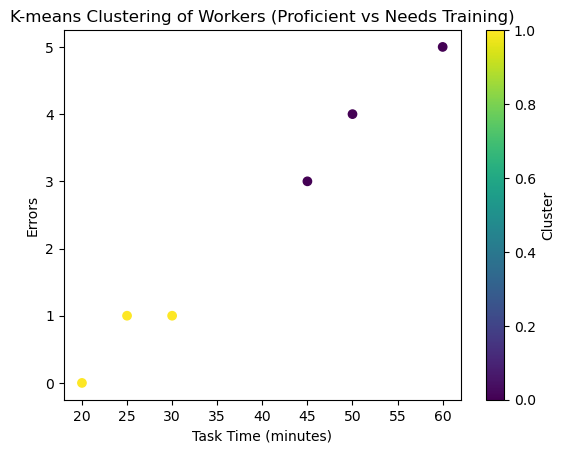

In [3]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Sample data - Worker ID, Task Time, Errors, Sentiment, Task Type
data = [
    {"worker_id": 1, "task_time": 45, "errors": 3, "sentiment": "negative", "task_type": "machine_setup"},
    {"worker_id": 2, "task_time": 30, "errors": 1, "sentiment": "positive", "task_type": "machine_setup"},
    {"worker_id": 3, "task_time": 60, "errors": 5, "sentiment": "negative", "task_type": "software_setup"},
    {"worker_id": 4, "task_time": 20, "errors": 0, "sentiment": "positive", "task_type": "software_setup"},
    {"worker_id": 5, "task_time": 50, "errors": 4, "sentiment": "negative", "task_type": "machine_setup"},
    {"worker_id": 6, "task_time": 25, "errors": 1, "sentiment": "positive", "task_type": "software_setup"},
]

# Convert data to pandas DataFrame for easier manipulation
df = pd.DataFrame(data)

# Feature columns (task time, errors)
X = df[['task_time', 'errors']].values

# Initialize the KMeans model with 2 clusters (proficient and needs training)
kmeans = KMeans(n_clusters=2, random_state=42)

# Fit the KMeans model to the data
kmeans.fit(X)

# Assign the cluster labels to the dataframe
df['cluster'] = kmeans.labels_

# Suggest worker pairings
def suggest_worker_pairs(df):
    # Split the workers into proficient and non-proficient based on the cluster label
    proficient_workers = df[df['cluster'] == 0]
    less_proficient_workers = df[df['cluster'] == 1]
    
    pairs = []
    
    for idx, less_proficient in less_proficient_workers.iterrows():
        # Find the most suitable proficient worker from the same task_type
        task_type = less_proficient['task_type']
        
        # Filter the proficient workers by task_type
        possible_buddies = proficient_workers[proficient_workers['task_type'] == task_type]
        
        # Suggest the first available proficient worker as a buddy (this can be adjusted)
        if not possible_buddies.empty:
            buddy = possible_buddies.iloc[0]
            pairs.append((less_proficient['worker_id'], buddy['worker_id']))
        else:
            # If no buddy with the same task_type, suggest the first proficient worker (can also be randomized)
            buddy = proficient_workers.iloc[0]
            pairs.append((less_proficient['worker_id'], buddy['worker_id']))
    
    return pairs

# Get the recommended pairs
pairs = suggest_worker_pairs(df)

# Print the recommended worker pairs
print("Recommended Worker Pairs for Training:")
for pair in pairs:
    print(f"Worker {pair[0]} paired with Worker {pair[1]}")

# Visualize the results
plt.scatter(df['task_time'], df['errors'], c=df['cluster'], cmap='viridis')
plt.xlabel('Task Time (minutes)')
plt.ylabel('Errors')
plt.title('K-means Clustering of Workers (Proficient vs Needs Training)')
plt.colorbar(label='Cluster')
plt.show()



In [5]:
import pandas as pd
import numpy as np

# Generate random urgency, task time, and errors for 30 workers
np.random.seed(42)  # For reproducibility

data = {
    "worker_id": range(1, 31),
    "task_time": np.random.randint(20, 60, 30),  # Task times between 20 and 60 minutes
    "errors": np.random.randint(0, 5, 30),  # Random errors between 0 and 5
    "sentiment": np.random.choice(["positive", "negative"], 30),  # Random sentiment
    "task_type": np.random.choice(["machine_setup", "software_setup"], 30),  # Random task types
}

# Creating the DataFrame
df = pd.DataFrame(data)

# Calculate urgency based on task_time and errors (simplified model)
df['urgency'] = (df['task_time'] * 0.5) + (df['errors'] * 2)  # Weighting time and errors
df['cluster'] = np.random.choice([0, 1], size=(30,))  # Cluster 0 is proficient, 1 is training-needed

# Sorting by urgency to show highest urgency first
df = df.sort_values(by='urgency', ascending=False)

# Show the DataFrame
print(df.head())


    worker_id  task_time  errors sentiment       task_type  urgency  cluster
5           6         58       4  negative  software_setup     37.0        0
12         13         59       3  negative   machine_setup     35.5        0
19         20         57       3  negative  software_setup     34.5        0
0           1         58       2  negative   machine_setup     33.0        0
22         23         52       3  negative   machine_setup     32.0        1


In [7]:
# Suggest worker pairs based on urgency and task_type
def suggest_worker_pairs(df):
    pairs = []
    
    # Loop through the workers sorted by urgency
    for idx, high_urgency_worker in df.iterrows():
        if high_urgency_worker['cluster'] == 1:  # If the worker needs more training
            # Match with a worker from Cluster 0 (proficient workers)
            potential_buddies = df[(df['cluster'] == 0) & (df['task_type'] == high_urgency_worker['task_type'])]
            
            if not potential_buddies.empty:
                buddy = potential_buddies.iloc[0]  # Pick the first available buddy (this can be adjusted)
                pairs.append((high_urgency_worker['worker_id'], buddy['worker_id']))
                
    return pairs

# Get the recommended pairs based on urgency
pairs = suggest_worker_pairs(df)

# Print the recommended worker pairs
print("Recommended Worker Pairs for Training based on Urgency:")
for pair in pairs:
    print(f"Worker {pair[0]} paired with Worker {pair[1]}")


Recommended Worker Pairs for Training based on Urgency:
Worker 23 paired with Worker 13
Worker 18 paired with Worker 6
Worker 11 paired with Worker 13
Worker 12 paired with Worker 13
Worker 22 paired with Worker 6
Worker 5 paired with Worker 13
Worker 14 paired with Worker 13
Worker 7 paired with Worker 6
Worker 3 paired with Worker 6
Worker 30 paired with Worker 13
Worker 10 paired with Worker 13
Worker 21 paired with Worker 6
Worker 17 paired with Worker 13
